In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA

# 1. Loading and Preprocessing the Iris Dataset
# Load the dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
print("Dataset loaded and preprocessed.")
data.head()


Dataset loaded and preprocessed.


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [2]:
print(data.isnull().sum()) 


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64


In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)


In [6]:
data_scaled = pd.DataFrame(data_scaled, columns=iris.feature_names)

In [7]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

In [8]:
data_pca = pd.DataFrame(data_pca, columns=['PCA1', 'PCA2'])

# Display the preprocessed data
print("Preprocessing complete.")
print(data_scaled.head())
print(data_pca.head())

Preprocessing complete.
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.900681          1.019004          -1.340227         -1.315444
1          -1.143017         -0.131979          -1.340227         -1.315444
2          -1.385353          0.328414          -1.397064         -1.315444
3          -1.506521          0.098217          -1.283389         -1.315444
4          -1.021849          1.249201          -1.340227         -1.315444
       PCA1      PCA2
0 -2.264703  0.480027
1 -2.080961 -0.674134
2 -2.364229 -0.341908
3 -2.299384 -0.597395
4 -2.389842  0.646835


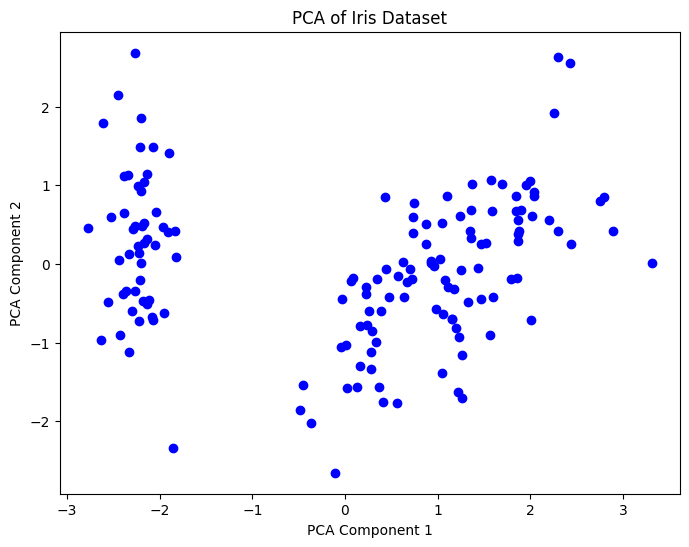

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(data_pca['PCA1'], data_pca['PCA2'], c='blue', label='Iris data')
plt.title("PCA of Iris Dataset")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

## A) KMeans Clustering
### KMeans clustering is a partition-based method that aims to divide a dataset into K distinct clusters. 
### It minimizes the within-cluster sum of squares by iteratively assigning data points to the nearest cluster center.
### The Iris dataset contains numerical data with clear groupings, making it suitable for clustering based on similarity.


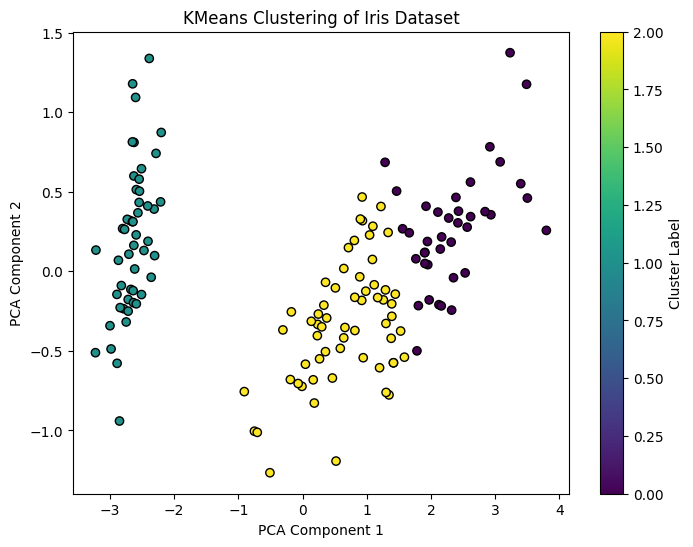

In [10]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(data)

# Visualizing KMeans Clusters
pca = PCA(2)  # Reduce to 2 dimensions for visualization
reduced_data = pca.fit_transform(data)
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans_labels, cmap='viridis', marker='o', edgecolor='k')
plt.title("KMeans Clustering of Iris Dataset")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster Label')
plt.show()

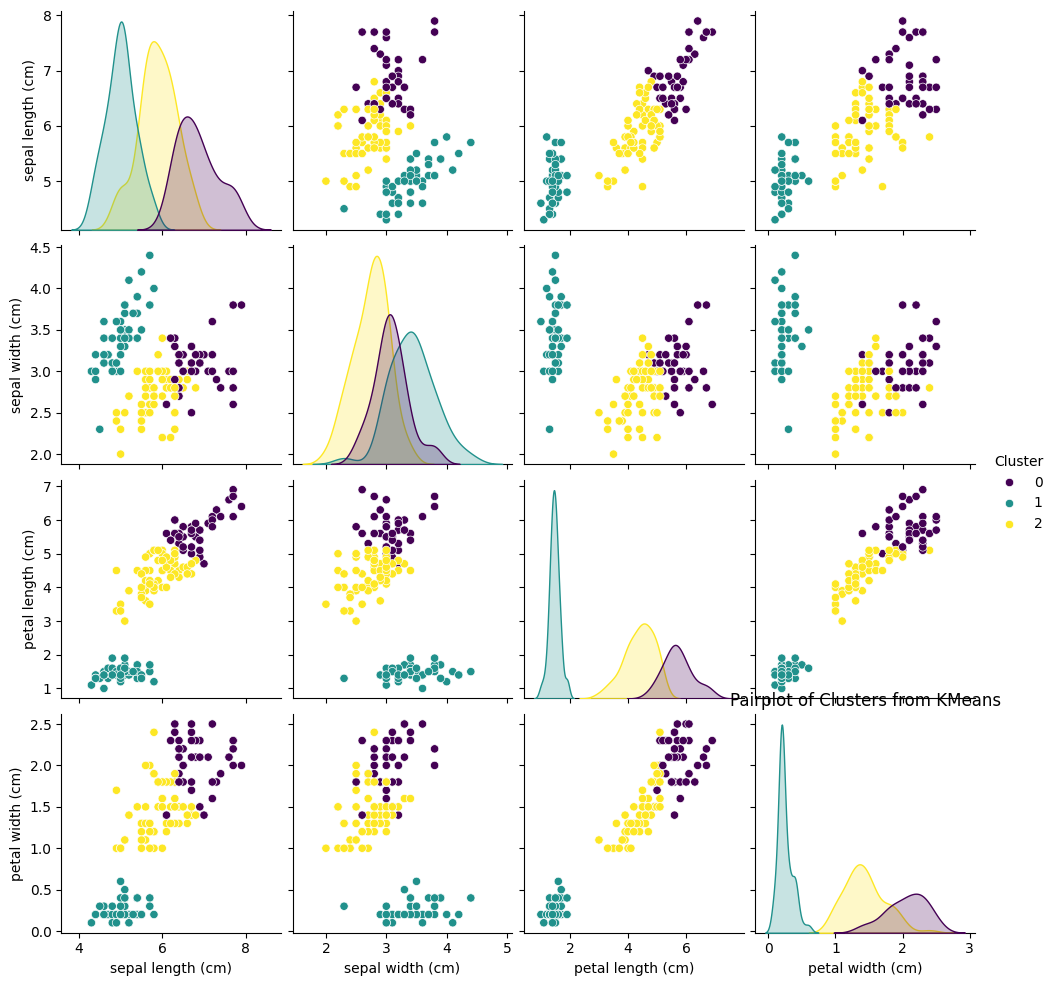

In [11]:
import seaborn as sns

# Add the cluster labels to the data for visualization
data_with_labels = data.copy()
data_with_labels['Cluster'] = kmeans_labels

# Create a pairplot to visualize clusters with respect to all features
sns.pairplot(data_with_labels, hue='Cluster', palette='viridis')
plt.title("Pairplot of Clusters from KMeans")
plt.show()

## B) Hierarchical Clustering
### Hierarchical clustering builds a tree of clusters using either an agglomerative (bottom-up) or divisive (top-down) approach.
### It does not require a predefined number of clusters, and the dendrogram helps in determining the optimal number of clusters.
### The Iris dataset has small and interpretable groupings, making hierarchical clustering a useful technique for visualizing and analyzing the clusters.




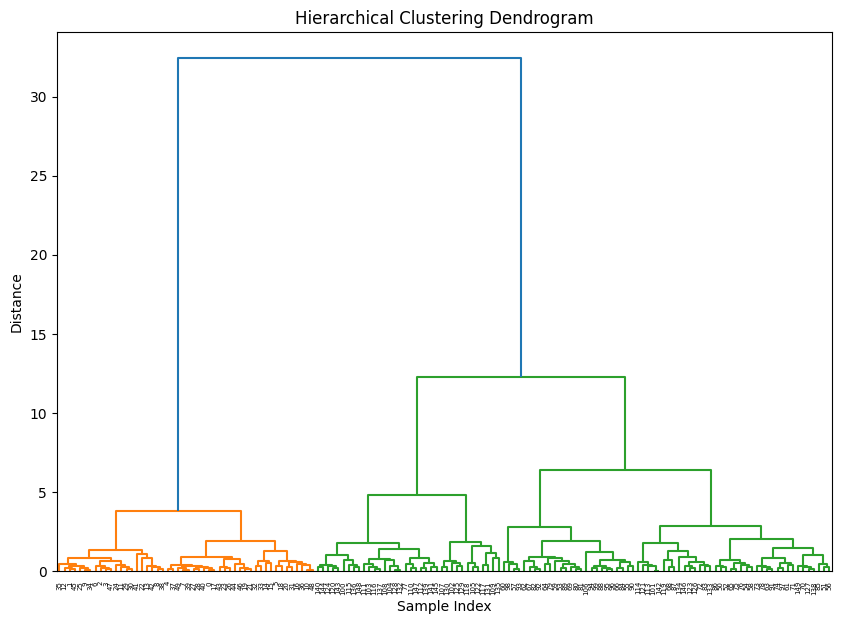

In [12]:
linked = linkage(data, method='ward')  # Using Ward's method to minimize variance within clusters

# Visualize dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='ascending', show_leaf_counts=True)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

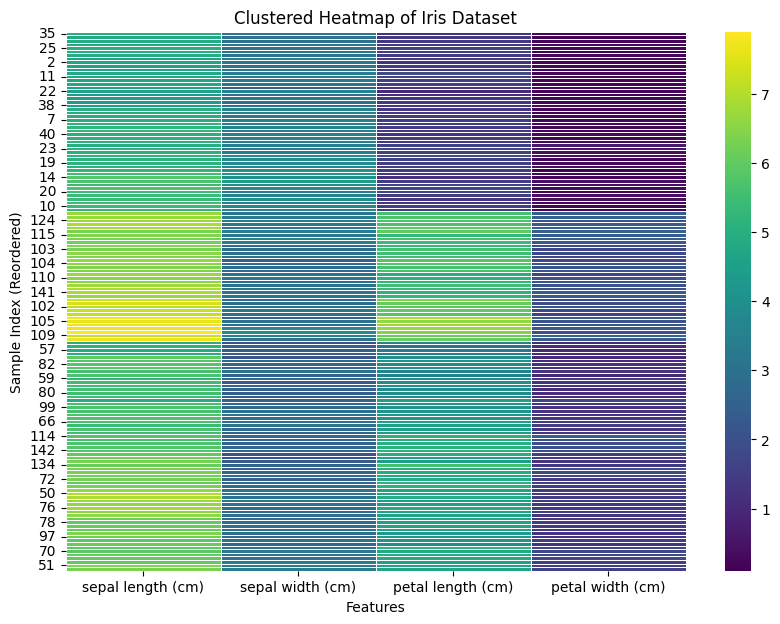

In [14]:
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering
linked = linkage(data, method='ward')

# Create a figure
plt.figure(figsize=(10, 7))

# Create a dendrogram to order the samples
dendro = dendrogram(linked, no_labels=True)

# Use the resulting order of samples from the dendrogram to reorder the distance matrix
ordered_data = data.iloc[dendro['leaves']]

# Plot the heatmap of the reordered data
sns.heatmap(ordered_data, cmap='viridis', annot=False, linewidths=0.5)
plt.title("Clustered Heatmap of Iris Dataset")
plt.xlabel("Features")
plt.ylabel("Sample Index (Reordered)")
plt.show()
